In [7]:
from datetime import datetime, date
from dateutil.relativedelta import relativedelta

def assign_actperiod(max_actperiod_str):
    """
    Berekent de volgende accounting periode (YYYYMM) op basis van een gegeven periode.
    Werkt correct over jaargrenzen heen (bijv. 202312 → 202401).
    """
    # 1️⃣ Inlezen als datetime (eerste dag van de maand)
    max_dt = datetime.strptime(max_actperiod_str, "%Y%m")
    
    # 2️⃣ Voeg één maand toe met relativedelta
    next_dt = max_dt + relativedelta(months=1)
    
    # 3️⃣ Format voor verdere verwerking
    next_period = next_dt.strftime("%Y%m")
    formatted = next_dt.strftime("%d %b %Y")  # Mooie notatie
    
    # 4️⃣ Toon resultaat
    print(f"Actuele periode: {max_actperiod_str} → Volgende: {next_period} ({formatted})")
    return next_period


# 🧭 Alle relevante testcases
test_periods = [
    "202301",  # jan → feb
    "202302",  # feb (niet-schrikkeljaar)
    "202303",  # mrt → apr
    "202304",  # apr → mei
    "202305",  # mei → jun
    "202306",  # jun → jul
    "202307",  # jul → aug
    "202308",  # aug → sep
    "202309",  # sep → okt
    "202310",  # okt → nov
    "202311",  # nov → dec
    "202312",  # dec → jan (jaarovergang)
    "202402",  # feb in schrikkeljaar (29 dagen) → mrt
    "202412",  # dec in schrikkeljaar → jan 2025
    "202512",  # dec volgend jaar → jan 2026
]
# Loop over alle testcases
for p in test_periods:
    assign_actperiod(p)

Actuele periode: 202301 → Volgende: 202302 (01 Feb 2023)
Actuele periode: 202302 → Volgende: 202303 (01 Mar 2023)
Actuele periode: 202303 → Volgende: 202304 (01 Apr 2023)
Actuele periode: 202304 → Volgende: 202305 (01 May 2023)
Actuele periode: 202305 → Volgende: 202306 (01 Jun 2023)
Actuele periode: 202306 → Volgende: 202307 (01 Jul 2023)
Actuele periode: 202307 → Volgende: 202308 (01 Aug 2023)
Actuele periode: 202308 → Volgende: 202309 (01 Sep 2023)
Actuele periode: 202309 → Volgende: 202310 (01 Oct 2023)
Actuele periode: 202310 → Volgende: 202311 (01 Nov 2023)
Actuele periode: 202311 → Volgende: 202312 (01 Dec 2023)
Actuele periode: 202312 → Volgende: 202401 (01 Jan 2024)
Actuele periode: 202402 → Volgende: 202403 (01 Mar 2024)
Actuele periode: 202412 → Volgende: 202501 (01 Jan 2025)
Actuele periode: 202512 → Volgende: 202601 (01 Jan 2026)


In [6]:
# 🧭 Alle relevante testcases
test_periods = [
    "202301",  # jan → feb
    "202302",  # feb (niet-schrikkeljaar)
    "202303",  # mrt → apr
    "202304",  # apr → mei
    "202305",  # mei → jun
    "202306",  # jun → jul
    "202307",  # jul → aug
    "202308",  # aug → sep
    "202309",  # sep → okt
    "202310",  # okt → nov
    "202311",  # nov → dec
    "202312",  # dec → jan (jaarovergang)
    "202402",  # feb in schrikkeljaar (29 dagen) → mrt
    "202412",  # dec in schrikkeljaar → jan 2025
    "202512",  # dec volgend jaar → jan 2026
]
# Loop over alle testcases
for p in test_periods:
    assign_actperiod(p)



Actuele periode: 202301 → Volgende: 202302 (01 Feb 2023)
Actuele periode: 202302 → Volgende: 202303 (01 Mar 2023)
Actuele periode: 202303 → Volgende: 202304 (01 Apr 2023)
Actuele periode: 202304 → Volgende: 202305 (01 May 2023)
Actuele periode: 202305 → Volgende: 202306 (01 Jun 2023)
Actuele periode: 202306 → Volgende: 202307 (01 Jul 2023)
Actuele periode: 202307 → Volgende: 202308 (01 Aug 2023)
Actuele periode: 202308 → Volgende: 202309 (01 Sep 2023)
Actuele periode: 202309 → Volgende: 202310 (01 Oct 2023)
Actuele periode: 202310 → Volgende: 202311 (01 Nov 2023)
Actuele periode: 202311 → Volgende: 202312 (01 Dec 2023)
Actuele periode: 202312 → Volgende: 202401 (01 Jan 2024)
Actuele periode: 202402 → Volgende: 202403 (01 Mar 2024)
Actuele periode: 202412 → Volgende: 202501 (01 Jan 2025)
Actuele periode: 202512 → Volgende: 202601 (01 Jan 2026)


In [4]:
#%%
# ============================================================
# Day 1 Assignment – Statistics for Data Science
# Python version – Dennis Fok, Erasmus University Rotterdam
# ============================================================

# In this exercise we will use three packages:
#%pip install wquantiles

%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats

In [18]:
from pathlib import Path

def find_data_directory(dataDirectoryName='data', verbose=True):
    """
    Zoekt omhoog vanaf de huidige werkdirectory (Path.cwd())
    totdat een map met de naam 'data' wordt gevonden.
    """
    current_dir = Path.cwd().resolve()  # start vanuit de werkdirectory

    if verbose:
        print(f"🔍 Start zoeken vanaf: {current_dir}")

    while current_dir != current_dir.root:
        candidate = current_dir / dataDirectoryName
        if verbose:
            print(f"➡️  Check: {candidate}")
        if candidate.is_dir():
            if verbose:
                print(f"✅ Gevonden: {candidate}")
            return candidate
        current_dir = current_dir.parent  # één niveau omhoog

    raise FileNotFoundError(
        f"❌ Geen map '{dataDirectoryName}' gevonden boven {Path.cwd()}"
    )


In [19]:
data_path = find_data_directory(verbose=True)
print("\n📁 Definitieve data-directory:", data_path)


🔍 Start zoeken vanaf: /Users/adilvural/learningGithubErasmus/2025_2026_DSBA_AI_StatisticsforDataScience/week 1
➡️  Check: /Users/adilvural/learningGithubErasmus/2025_2026_DSBA_AI_StatisticsforDataScience/week 1/data
➡️  Check: /Users/adilvural/learningGithubErasmus/2025_2026_DSBA_AI_StatisticsforDataScience/data
✅ Gevonden: /Users/adilvural/learningGithubErasmus/2025_2026_DSBA_AI_StatisticsforDataScience/data

📁 Definitieve data-directory: /Users/adilvural/learningGithubErasmus/2025_2026_DSBA_AI_StatisticsforDataScience/data


In [20]:
from pathlib import Path

# === Zoek naar 'data' map vanaf de huidige folder omhoog ===
def find_data_directory(dataDirectoryName='data'):
    current = Path.cwd().resolve()
    while current != current.root:
        candidate = current / dataDirectoryName
        if candidate.is_dir():
            return candidate  # zodra gevonden, stoppen
        current = current.parent
    raise FileNotFoundError(f"Geen map '{dataDirectoryName}' gevonden boven {Path.cwd()}")

# === Gebruik het pad ===
DATA = find_data_directory()

print("📁 Data directory gevonden:", DATA)


📁 Data directory gevonden: /Users/adilvural/learningGithubErasmus/2025_2026_DSBA_AI_StatisticsforDataScience/data


In [23]:
#%% 
# ------------------------------------------------------------
# Exercise 1.1 – Data Loading and Exploration
# ------------------------------------------------------------

# (a) Load the data
houseprice = pd.read_csv(DATA/"houseprice.csv")
houseprice.columns

Index(['Unnamed: 0', 'airco', 'bathrms', 'bedrooms', 'driveway', 'fullbase',
       'garagepl', 'gashw', 'lotsize', 'prefarea', 'price', 'recroom',
       'stories'],
      dtype='object')

In [53]:
# (b) Explore the dataset
display(houseprice)
list(houseprice)
houseprice.info()

,Unnamed: 0,airco,bathrms,bedrooms,driveway,fullbase,garagepl,gashw,lotsize,prefarea,price,recroom,stories
0,1,0,1,3,1,1,1,0,5850,0,42000,0,2
1,2,0,1,2,1,0,0,0,4000,0,38500,0,1
2,3,0,1,3,1,0,0,0,3060,0,49500,0,1
3,4,0,1,3,1,0,0,0,6650,0,60500,1,2
4,5,0,1,2,1,0,0,0,6360,0,61000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,542,1,2,3,1,0,0,0,4800,0,91500,1,4
542,543,1,2,3,1,0,0,0,6000,0,94000,0,4
543,544,1,2,3,1,0,1,0,6000,0,103000,1,4
544,545,1,2,3,1,0,1,0,6000,0,105000,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  546 non-null    int64
 1   airco       546 non-null    int64
 2   bathrms     546 non-null    int64
 3   bedrooms    546 non-null    int64
 4   driveway    546 non-null    int64
 5   fullbase    546 non-null    int64
 6   garagepl    546 non-null    int64
 7   gashw       546 non-null    int64
 8   lotsize     546 non-null    int64
 9   prefarea    546 non-null    int64
 10  price       546 non-null    int64
 11  recroom     546 non-null    int64
 12  stories     546 non-null    int64
dtypes: int64(13)
memory usage: 55.6 KB


In [54]:
# Questions:
# - What does a single observation represent?
# - Which variables are present?
# - What are the measurement units?
# - What are the variable types?

# (c) Dimensions of the dataset
houseprice.shape  # (rows, columns)

(546, 13)

,Unnamed: 0,airco,bathrms,bedrooms,driveway,fullbase,garagepl,gashw,lotsize,prefarea,price,recroom,stories
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,0.316850,1.285714,2.965201,0.858974,0.349817,0.692308,0.045788,5150.265568,0.234432,68121.597070,0.177656,1.807692
std,157.760895,0.465675,0.502158,0.737388,0.348367,0.477349,0.861307,0.209216,2168.158725,0.424032,26702.670926,0.382573,0.868203
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1650.000000,0.000000,25000.000000,0.000000,1.000000
25%,137.250000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3600.000000,0.000000,49125.000000,0.000000,1.000000
50%,273.500000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,4600.000000,0.000000,62000.000000,0.000000,2.000000
75%,409.750000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,6360.000000,0.000000,82000.000000,0.000000,2.000000
max,546.000000,1.000000,4.000000,6.000000,1.000000,1.000000,3.000000,1.000000,16200.000000,1.000000,190000.000000,1.000000,4.000000


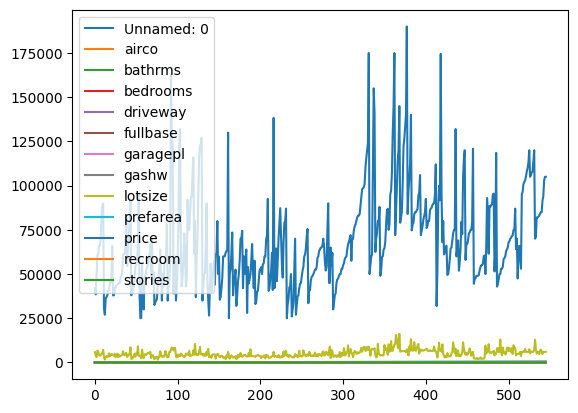

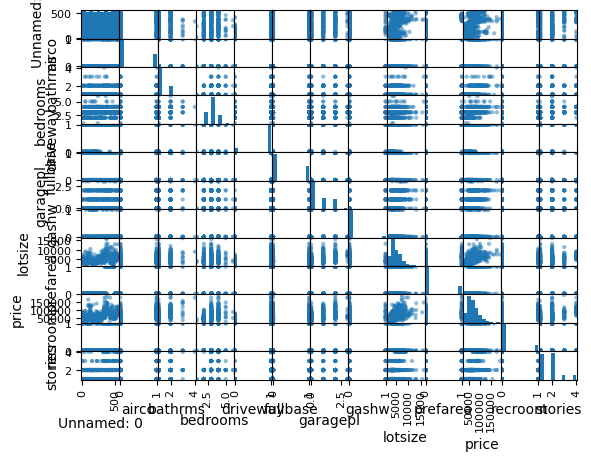

In [55]:
# (d) Basic plots and descriptive statistics
houseprice.plot()
pd.plotting.scatter_matrix(houseprice)
houseprice.describe()
# Note key points about ranges, scales, missing values, etc.

In [56]:
#%%
# ------------------------------------------------------------
# Exercise 1.2 – Univariate Summary Statistics
# ------------------------------------------------------------

# (a) Mean house price
houseprice.price.mean()

np.float64(68121.59706959708)

In [57]:
# (b) Median price & comparison for skewness
houseprice.price.median()

np.float64(62000.0)

In [58]:
# (c) Cheapest and most expensive house
houseprice.price.min(), houseprice.price.max()

(np.int64(25000), np.int64(190000))

In [59]:
# (d) Range and standard deviation
price_range = houseprice.price.max() - houseprice.price.min()
price_std = houseprice.price.std()

price_range, price_std

(np.int64(165000), np.float64(26702.670925794933))

In [60]:
# (e) Frequency tables for categorical variables
for col in ["airco", "driveway", "fullbase", "gashw", "prefarea", "recroom"]:
    print(f"\n{col}")
    print(houseprice[col].value_counts())
    print(houseprice[col].value_counts().sort_index())


airco
airco
0    373
1    173
Name: count, dtype: int64
airco
0    373
1    173
Name: count, dtype: int64

driveway
driveway
1    469
0     77
Name: count, dtype: int64
driveway
0     77
1    469
Name: count, dtype: int64

fullbase
fullbase
0    355
1    191
Name: count, dtype: int64
fullbase
0    355
1    191
Name: count, dtype: int64

gashw
gashw
0    521
1     25
Name: count, dtype: int64
gashw
0    521
1     25
Name: count, dtype: int64

prefarea
prefarea
0    418
1    128
Name: count, dtype: int64
prefarea
0    418
1    128
Name: count, dtype: int64

recroom
recroom
0    449
1     97
Name: count, dtype: int64
recroom
0    449
1     97
Name: count, dtype: int64


In [61]:
# (f) Number of houses with 5 or 6 bedrooms
sum(houseprice.bedrooms == 6)
sum(houseprice.bedrooms == 5)

10

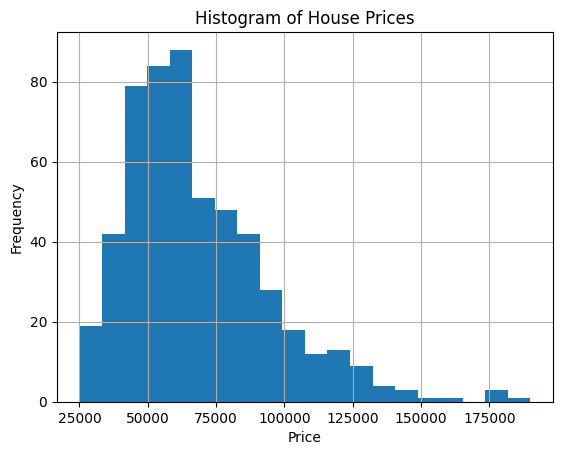

In [62]:
#%%
# ------------------------------------------------------------
# Exercise 1.3 – Univariate Plots
# ------------------------------------------------------------

# (a) Histogram of house prices
houseprice.price.hist(bins=20)
plt.title("Histogram of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

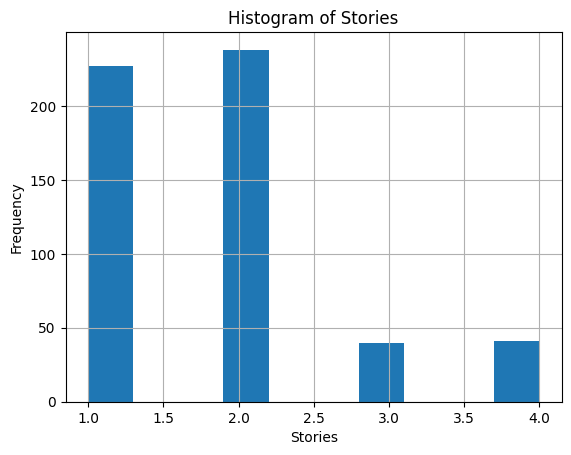

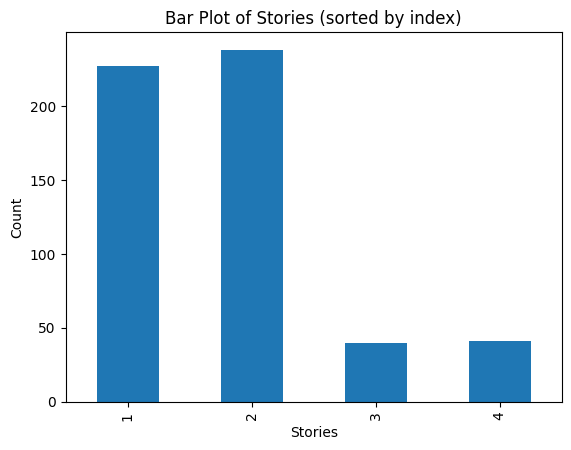

In [63]:
# (b) Bar plot of stories variable
houseprice.stories.hist()
plt.title("Histogram of Stories")
plt.xlabel("Stories")
plt.ylabel("Frequency")
plt.show()

houseprice.stories.value_counts().sort_index().plot.bar()
plt.title("Bar Plot of Stories (sorted by index)")
plt.xlabel("Stories")
plt.ylabel("Count")
plt.show()

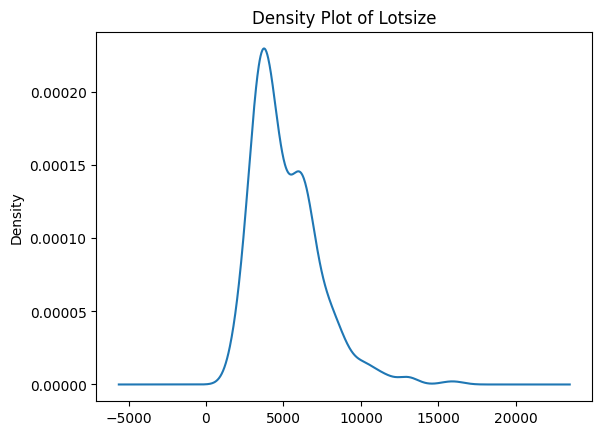

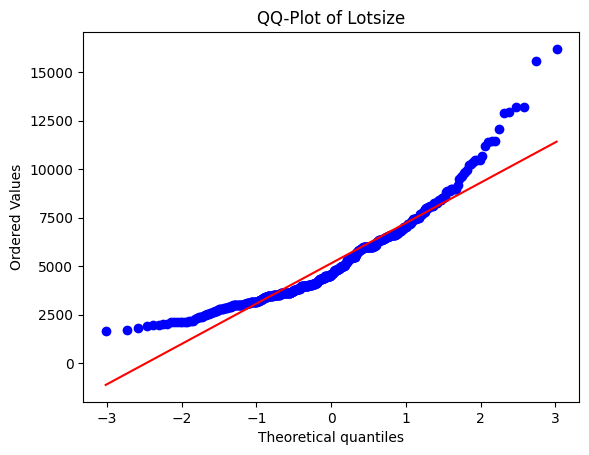

In [64]:
# (c) Check normality of lotsize
houseprice.lotsize.plot.density()
plt.title("Density Plot of Lotsize")
plt.show()

stats.probplot(houseprice.lotsize, dist="norm", plot=plt)
plt.title("QQ-Plot of Lotsize")
plt.show()

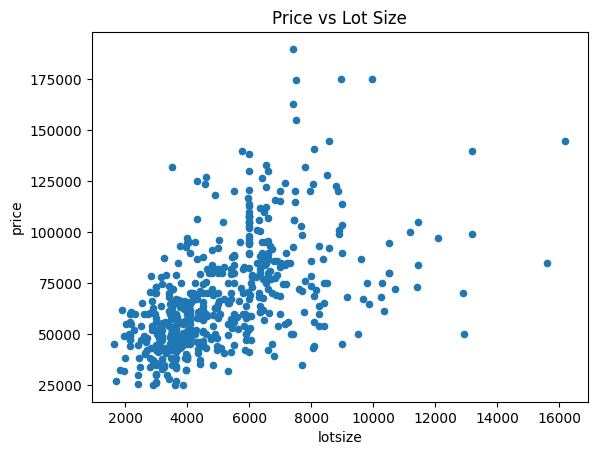

bathrms,1,2,3,4
bedrooms,,,,
1,2,0,0,0
2,128,8,0,0
3,225,72,4,0
4,42,48,4,1
5,4,4,2,0
6,1,1,0,0


In [65]:
#%%
# ------------------------------------------------------------
# Exercise 1.4 – Bivariate Relationships
# ------------------------------------------------------------

# (a) Scatterplot: price vs lotsize
houseprice.plot(x="lotsize", y="price", kind="scatter")
plt.title("Price vs Lot Size")
plt.show()

# (b) Cross-tab: bedrooms vs bathrooms
pd.crosstab(houseprice.bedrooms, houseprice.bathrms)

In [66]:
# (c) Bedrooms vs preferred area
pd.crosstab(
    houseprice.bedrooms,
    houseprice.prefarea,
    margins=True,
    normalize="index"
)

prefarea,0,1
bedrooms,,
1,1.000000,0.000000
2,0.882353,0.117647
3,0.707641,0.292359
4,0.757895,0.242105
5,0.900000,0.100000
6,1.000000,0.000000
All,0.765568,0.234432


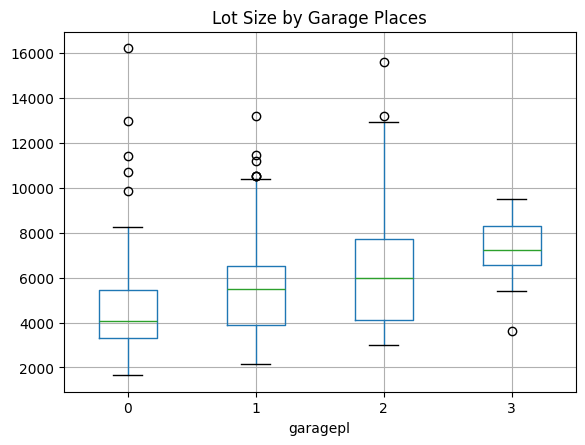

In [67]:
# (d) Conditional boxplots: lotsize by garage places
houseprice.boxplot(column="lotsize", by="garagepl")
plt.title("Lot Size by Garage Places")
plt.suptitle("")  # Remove automatic pandas subtitle
plt.show()

In [68]:

#%%
# ------------------------------------------------------------
# Exercise 2.1 – Volkswagen Prices
# ------------------------------------------------------------

# Load data
vwgolf = pd.read_csv("vwgolf.csv")

# (b) Summaries
vwgolf.info()
vwgolf.describe()
vwgolf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Version                56 non-null     object 
 1   Class                  56 non-null     object 
 2   Transmission           46 non-null     object 
 3   Fuel                   56 non-null     object 
 4   Colour                 56 non-null     object 
 5   RoadTaxPM              56 non-null     float64
 6   ServiceCostsPM         56 non-null     float64
 7   TyresPM                56 non-null     float64
 8   FuelCostPM             56 non-null     float64
 9   TotalCostPM            56 non-null     float64
 10  CostPKm                56 non-null     float64
 11  CostPY                 56 non-null     float64
 12  APKExpiry              56 non-null     object 
 13  NrOwners               56 non-null     int64  
 14  OwnerSince             56 non-null     object 
 15  PrivateL

Version                   0
Class                     0
Transmission             10
Fuel                      0
Colour                    0
RoadTaxPM                 0
ServiceCostsPM            0
TyresPM                   0
FuelCostPM                0
TotalCostPM               0
CostPKm                   0
CostPY                    0
APKExpiry                 0
NrOwners                  0
OwnerSince                0
PrivateLastOwner          0
DateNLRegistration        0
Imported                  0
PriceNew                  0
EngineCapacity            0
Power                     0
TopSpeed                  0
Turbo                     0
AccelerationTime          4
FuelKmL                   0
C02Emission               0
WeightEmpty               0
WeightMax                 0
WeightBrakedTrailer       0
WeightTrailerNoBrakes     0
CurrentBid               22
TransmissionAuto         10
NrGears                  10
AskingPrice               0
Mileage                   3
DaysOwned           

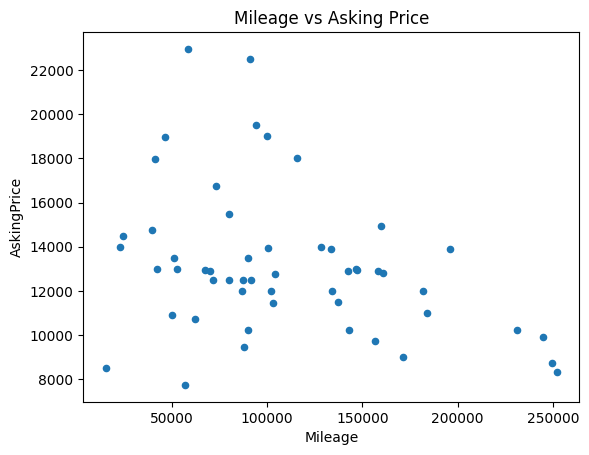

In [69]:
# (c) Scatterplot: Mileage vs AskingPrice
vwgolf.plot(x="Mileage", y="AskingPrice", kind="scatter")
plt.title("Mileage vs Asking Price")
plt.show()

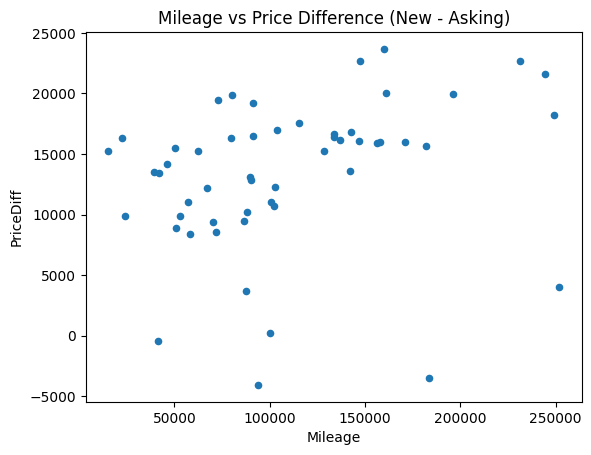

In [70]:
# (d) Scatterplot: Mileage vs (PriceNew - AskingPrice)
vwgolf["PriceDiff"] = vwgolf["PriceNew"] - vwgolf["AskingPrice"]
vwgolf.plot(x="Mileage", y="PriceDiff", kind="scatter")
plt.title("Mileage vs Price Difference (New - Asking)")
plt.show()

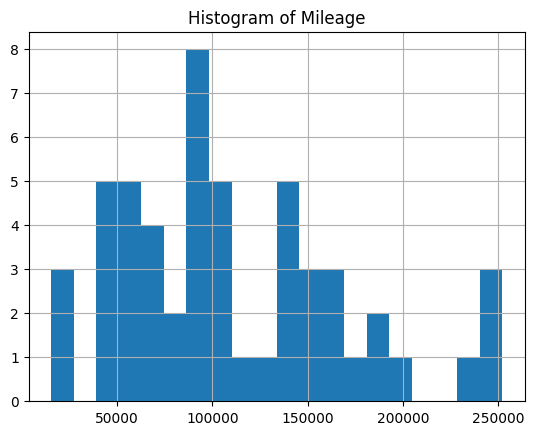

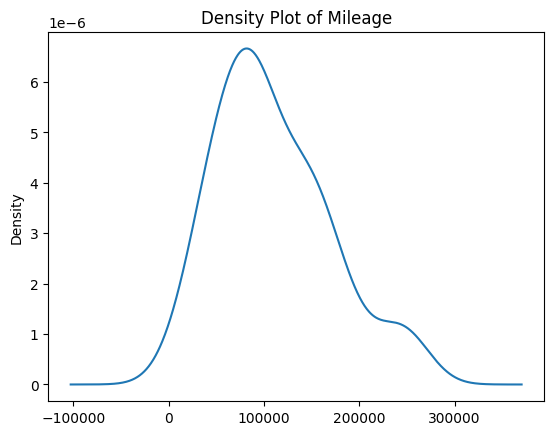

In [71]:
# (e) Histogram and density plot of Mileage
vwgolf.Mileage.hist(bins=20)
plt.title("Histogram of Mileage")
plt.show()
vwgolf.Mileage.plot.density()
plt.title("Density Plot of Mileage")
plt.show()

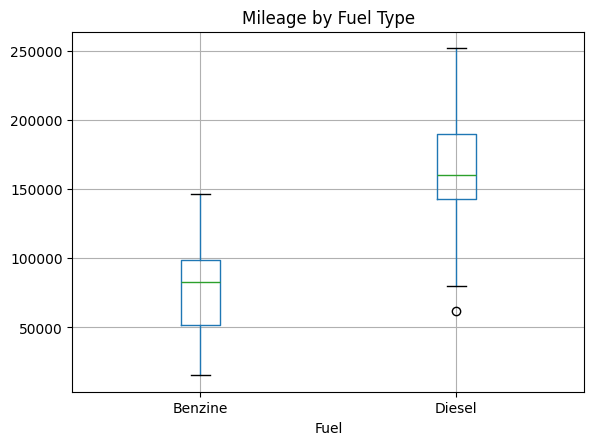

In [72]:
# (f) Boxplots of Mileage by Fuel type
vwgolf.boxplot(column="Mileage", by="Fuel")
plt.title("Mileage by Fuel Type")
plt.suptitle("")
plt.show()

In [73]:
# (g) Min, median, max number of owners
vwgolf["NrOwners"].min(), vwgolf["NrOwners"].median(), vwgolf["NrOwners"].max()


(np.int64(1), np.float64(2.0), np.int64(7))

In [74]:
# (h) Quantiles of PriceNew - AskingPrice
vwgolf["PriceDiff"].quantile([0.25, 0.5, 0.75])

0.25    10559.75
0.50    15373.50
0.75    16834.75
Name: PriceDiff, dtype: float64

In [75]:
# (i) How many diesel cars have automatic transmission?
len(vwgolf[(vwgolf["Fuel"] == "Diesel") & (vwgolf["Transmission"] == "Automatic")])



0

In [76]:
# Alle unieke waarden van Transmission
print("Distinct values in Transmission column:")
print(vwgolf["Transmission"].unique())

Distinct values in Transmission column:
[nan 'Automatic 5 Gears' 'Manual 5 Gears' 'Automatic 7 Gears'
 'Manual 6 Gears' 'Automatic 6 Gears']


In [77]:
# Maak een nieuwe kolom die groepeert op Manual vs Automatic
vwgolf["TransmissionType"] = vwgolf["Transmission"].apply(
    lambda x: "Manual" 
    if pd.notna(x) and x.startswith("Manual") 
    else ("Automatic" if pd.notna(x) else "Unknown")
)
print(vwgolf["TransmissionType"].unique())


['Unknown' 'Automatic' 'Manual']


In [78]:
print("\nAlle Manual types samen:")
manual_counts = vwgolf[vwgolf["TransmissionType"] == "Manual"]["Transmission"].value_counts()
print(manual_counts)
print(f"Totaal Manual: {manual_counts.sum()}")


Alle Manual types samen:
Transmission
Manual 5 Gears    18
Manual 6 Gears    13
Name: count, dtype: int64
Totaal Manual: 31


In [79]:
print("\nAlle Automatic types samen:")
automatic_counts = vwgolf[vwgolf["TransmissionType"] == "Automatic"]["Transmission"].value_counts()
print(automatic_counts)
print(f"Totaal Automatic: {automatic_counts.sum()}")


Alle Automatic types samen:
Transmission
Automatic 7 Gears    8
Automatic 6 Gears    6
Automatic 5 Gears    1
Name: count, dtype: int64
Totaal Automatic: 15


In [80]:
print("\n" + "-"*40)
print("SAMENVATTING:")
print("-"*40)
grouped_counts = vwgolf["TransmissionType"].value_counts()
print(grouped_counts)


----------------------------------------
SAMENVATTING:
----------------------------------------
TransmissionType
Manual       31
Automatic    15
Unknown      10
Name: count, dtype: int64


In [81]:
print("\nPercentages gegroepeerd:")
grouped_pct = vwgolf["TransmissionType"].value_counts(normalize=True) * 100
print(grouped_pct.round(1))


Percentages gegroepeerd:
TransmissionType
Manual       55.4
Automatic    26.8
Unknown      17.9
Name: proportion, dtype: float64


In [82]:
# (i) How many diesel cars have automatic transmission?
len(vwgolf[(vwgolf["Fuel"] == "Diesel") & (vwgolf["TransmissionType"] == "Automatic")])

2

In [83]:
pd.crosstab(vwgolf["Fuel"], vwgolf["TransmissionType"])

TransmissionType,Automatic,Manual,Unknown
Fuel,,,
Benzine,13,16,8
Diesel,2,15,2


In [84]:
# (j) Min and max of Mileage (ignores missing values)
vwgolf.Mileage.min(), vwgolf.Mileage.max()

(np.float64(15389.0), np.float64(252000.0))

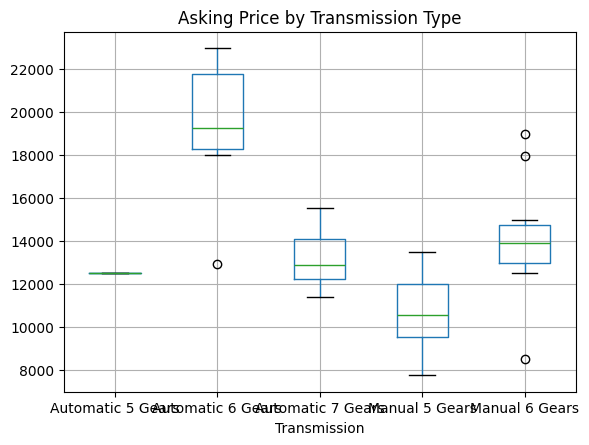

In [88]:
#%%
# ------------------------------------------------------------
# Exercise 2.2 – Creative Questions
# ------------------------------------------------------------

# Feel free to explore relationships, trends, or outliers.
# Example ideas:
# - Correlation matrix between numeric variables
# - Distribution of AskingPrice by Transmission
# - Scatterplot of Age vs PriceDiff

# Example:
vwgolf.corr(numeric_only=True)

vwgolf.boxplot(column="AskingPrice", by="Transmission")
plt.title("Asking Price by Transmission Type")
plt.suptitle("")
plt.show()


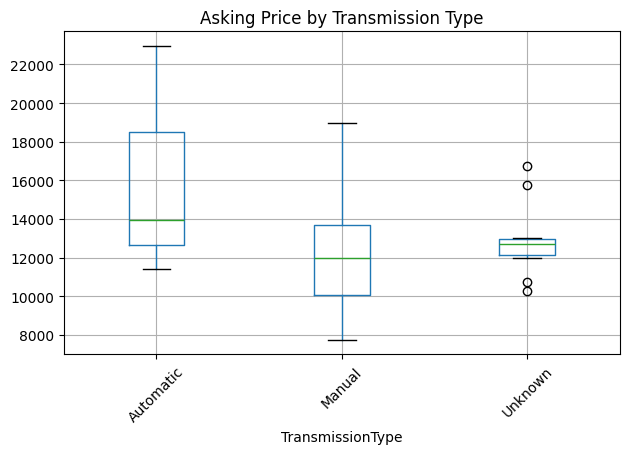

In [87]:
# Example:
vwgolf.corr(numeric_only=True)

vwgolf.boxplot(column="AskingPrice", by="TransmissionType")
plt.title("Asking Price by Transmission Type")
plt.suptitle("")  # Remove automatic pandas subtitle
plt.xticks(rotation=45)  # Roteer x-as labels 45 graden
plt.tight_layout()  # Zorg voor betere spacing
plt.show()

In [ ]:
#%pip install GitPython

from git import Repo
from pathlib import Path

# Automatisch het juiste pad vinden
current_path = Path.cwd()
print(current_path)

/Users/adilvural/learningGithubErasmus/2025_2026_DSBA_AI_StatisticsforDataScience/week 1


In [ ]:
git checkout mybranch
git fetch origin
git merge origin/main   # of: git rebase origin/main
# conflicts oplossen → commit → push → PR → merge


In [15]:
fruits =["apple","banana","cherry"]

#for fruit in fruits:
#    print(fruit)

#for i in range(len(fruits)):
#    print(i,fruits[i]) 

for i, fruit in enumerate(fruits):
    print(i, fruit)


0 apple
1 banana
2 cherry
